In [5]:
import pandas as pd

# Last inn datasettet
housing = pd.read_csv('AmesHousing.csv')

# Identifiser kategoriske kolonner
categorical_cols = housing.select_dtypes(include=['object']).columns

# Fyll manglende verdier med 'Unknown'
housing[categorical_cols] = housing[categorical_cols].fillna('Unknown')

# One-hot encode de kategoriske kolonnene
housing_encoded = pd.get_dummies(housing, columns=categorical_cols, drop_first=True)

# Sjekk resultatet
print(housing_encoded.head())


In [7]:
from sklearn.model_selection import train_test_split

# Del datasettet i trenings- og testsett (70% treningsdata, 30% testdata)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Konverter ikke-numeriske kolonner til numeriske (om nødvendig)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Sjekk for manglende verdier
print(X_train.isnull().sum())
print(X_test.isnull().sum())

# Fyll manglende verdier med 0
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Hvis du har brukt one-hot encoding, kan du sikre at X_test har samme kolonner som X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


Order                       0
PID                         0
MS SubClass                 0
Lot Frontage              347
Lot Area                    0
                         ... 
Sale Condition_AdjLand      0
Sale Condition_Alloca       0
Sale Condition_Family       0
Sale Condition_Normal       0
Sale Condition_Partial      0
Length: 278, dtype: int64
Order                       0
PID                         0
MS SubClass                 0
Lot Frontage              143
Lot Area                    0
                         ... 
Sale Condition_AdjLand      0
Sale Condition_Alloca       0
Sale Condition_Family       0
Sale Condition_Normal       0
Sale Condition_Partial      0
Length: 278, dtype: int64


In [9]:
from sklearn.linear_model import LinearRegression

# Tren modellen
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Gjør prediksjoner på testdata
y_pred = model.predict(X_test)

# Beregn MSE og R²-score for testdata
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 1451091865.146862
R² Score: 0.793568995738526


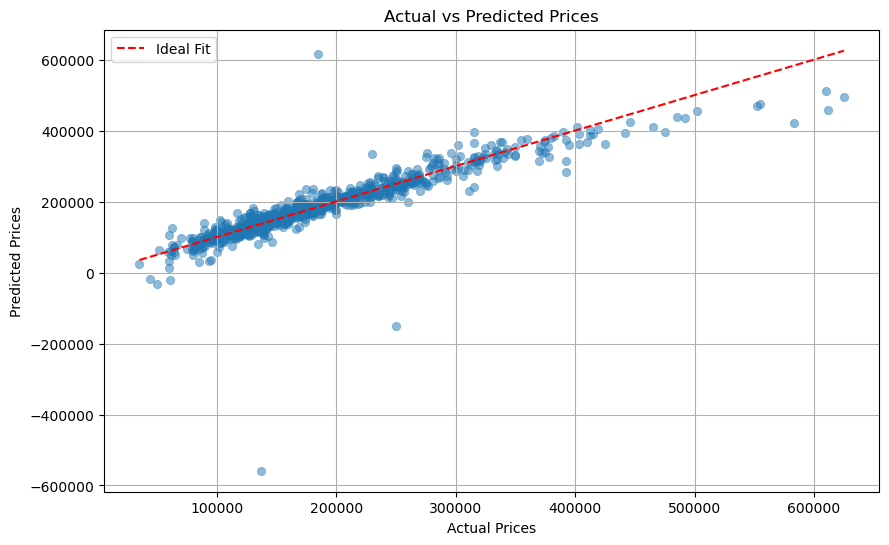

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Funksjon for å plotte resultater
def plot_regression_results(y_test, y_pred):
    results_df = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred
    })
    results_df = results_df.sort_values(by='Actual')

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Actual', y='Predicted', data=results_df, alpha=0.5, edgecolor=None)
    plt.plot(results_df['Actual'], results_df['Actual'], color='red', linestyle='--', label='Ideal Fit')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title('Actual vs Predicted Prices')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot testresultater
plot_regression_results(y_test, y_pred)
